In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
file_path = "C:/Users/himan/Downloads/pollution_2000_2023.csv/pollution_2000_2023.csv"

In [3]:
data = pd.read_csv(file_path, index_col = 0)
numeric_data = data.select_dtypes(['float', 'int'])
cat_data = data.select_dtypes(['object', 'string'])

In [4]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

numeric_data_scaled = numeric_data.copy(deep = True)
for col in numeric_data_scaled:
    numeric_data_scaled[col] = scaler.fit_transform(numeric_data_scaled[[col]])

In [5]:
data.head(3)

,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,10,37,0.878947,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,10,30,1.066667,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,9,15,1.762500,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 665414 entries, 0 to 665413
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               665414 non-null  object 
 1   Address            665414 non-null  object 
 2   State              665414 non-null  object 
 3   County             665414 non-null  object 
 4   City               665414 non-null  object 
 5   O3 Mean            665414 non-null  float64
 6   O3 1st Max Value   665414 non-null  float64
 7   O3 1st Max Hour    665414 non-null  int64  
 8   O3 AQI             665414 non-null  int64  
 9   CO Mean            665414 non-null  float64
 10  CO 1st Max Value   665414 non-null  float64
 11  CO 1st Max Hour    665414 non-null  int64  
 12  CO AQI             665414 non-null  float64
 13  SO2 Mean           665414 non-null  float64
 14  SO2 1st Max Value  665414 non-null  float64
 15  SO2 1st Max Hour   665414 non-null  int64  
 16  SO2 AQI

**Converting Date Column to datetime datatype**

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data.isna().sum()

Date                 0
Address              0
State                0
County               0
City                 0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
dtype: int64

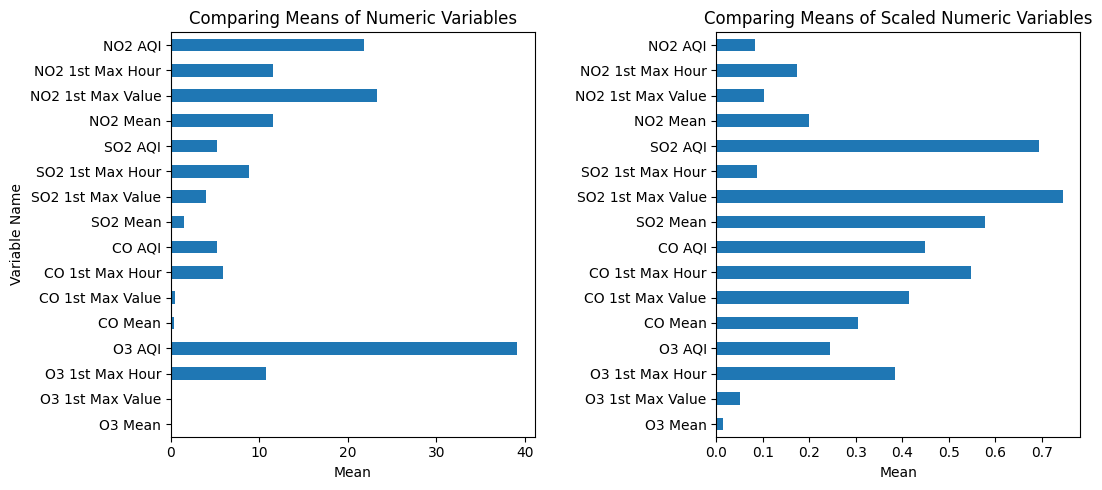

In [9]:
plt.figure(figsize = (11, 5))
plt.subplot(1,2,1)
data.mean(numeric_only = True).plot(kind = 'barh')
plt.title('Comparing Means of Numeric Variables')
plt.ylabel('Variable Name')
plt.xlabel('Mean')


plt.subplot(1,2,2)
numeric_data_scaled.mean(numeric_only = True).plot(kind = 'barh')
plt.title('Comparing Means of Scaled Numeric Variables')
plt.xlabel('Mean')

plt.tight_layout()
plt.subplots_adjust(wspace = 0.5)
plt.show()

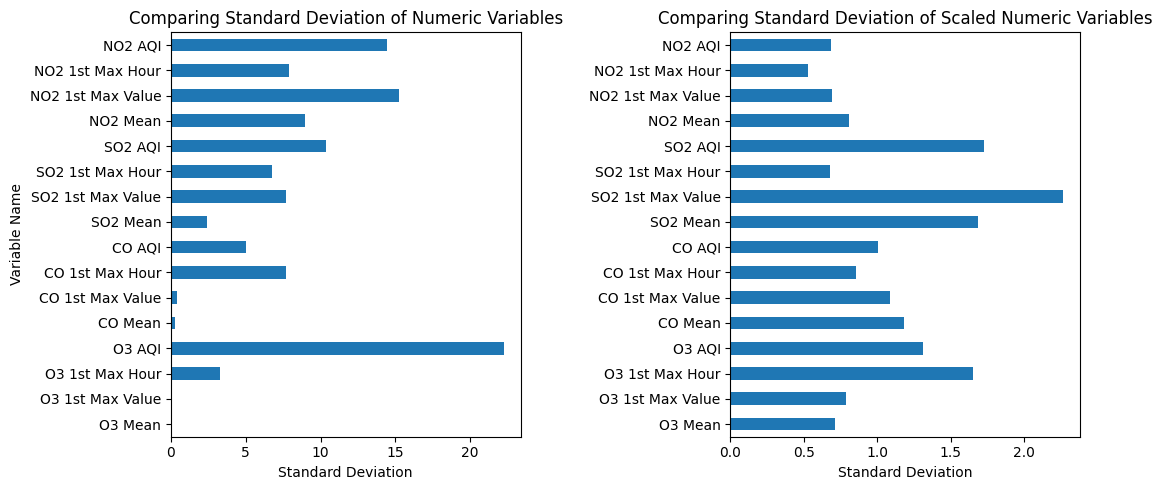

In [10]:
plt.figure(figsize = (11, 5))
plt.subplot(1,2,1)
data.std(numeric_only = True).plot(kind = 'barh')
plt.title('Comparing Standard Deviation of Numeric Variables')
plt.ylabel('Variable Name')
plt.xlabel('Standard Deviation')

plt.subplot(1,2,2)
numeric_data_scaled.std(numeric_only = True).plot(kind = 'barh')
plt.title('Comparing Standard Deviation of Scaled Numeric Variables')
plt.xlabel('Standard Deviation')


plt.tight_layout()
plt.subplots_adjust(wspace = 0.6)

plt.show()

**Correlation Map**

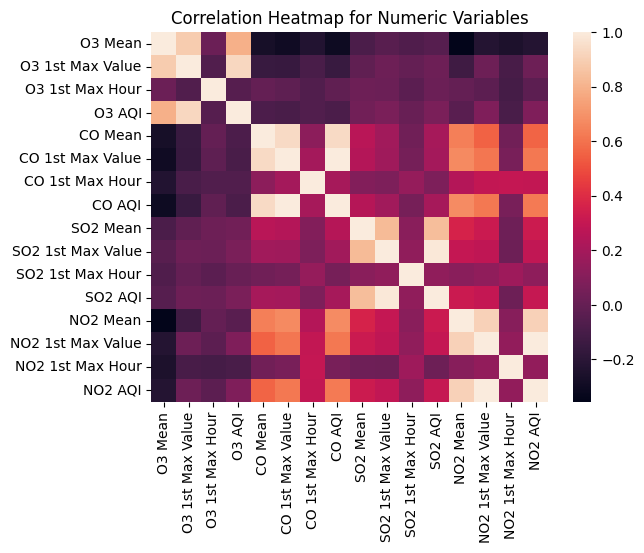

In [11]:
sns.heatmap(data.corr(numeric_only = True))
plt.title('Correlation Heatmap for Numeric Variables')

plt.show()

**Filtered Correlation Map for Correlation more than 0.5**

<Axes: >

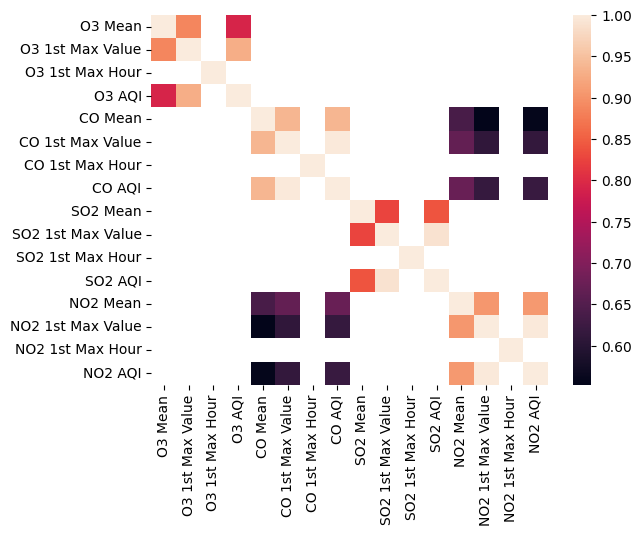

In [12]:
sns.heatmap(data.corr(numeric_only = True)[data.corr(numeric_only = True) > 0.5])

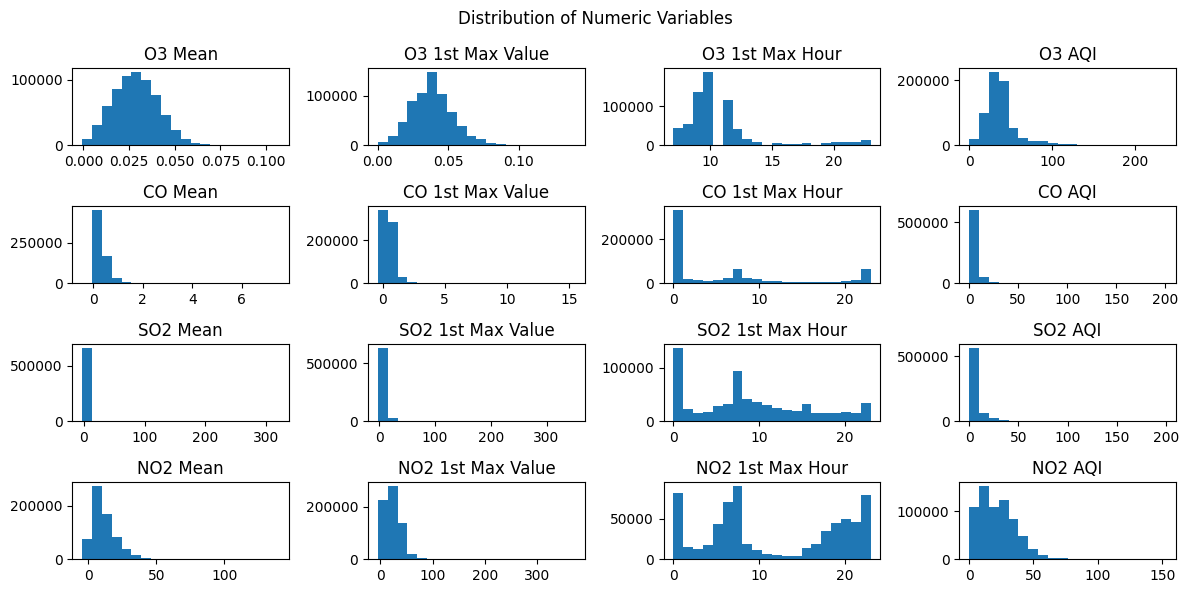

In [13]:
plt.figure(figsize = (12, 6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.hist(numeric_data[numeric_data.columns[i]], bins = 20)
    plt.title(numeric_data.columns[i])

plt.suptitle('Distribution of Numeric Variables')


plt.tight_layout()

plt.show()

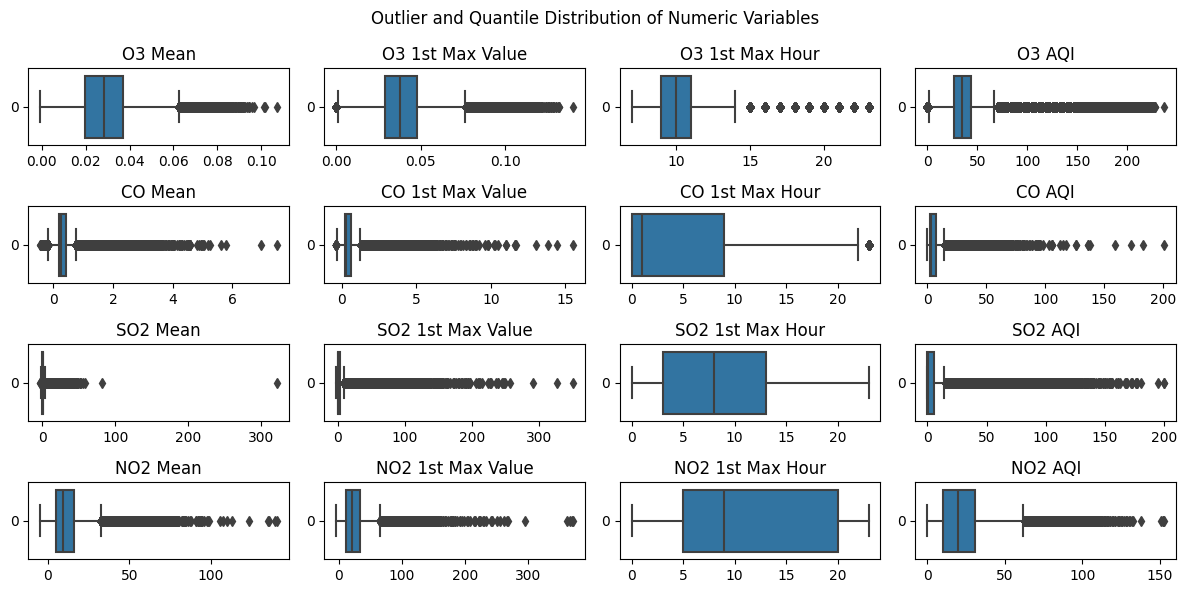

In [14]:
plt.figure(figsize = (12, 6))
for i in range(16):
    plt.subplot(4,4,i+1)
    sns.boxplot(numeric_data[numeric_data.columns[i]], orient = 'horizontal')
    plt.title(numeric_data.columns[i])

plt.suptitle('Outlier and Quantile Distribution of Numeric Variables')


plt.tight_layout()

plt.show()

## Categorical Data Analysis

**Categorical Subset Focused Preview**

In [15]:
cat_data.head()

,Date,Address,State,County,City
0,2000-01-01,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix
1,2000-01-02,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix
2,2000-01-03,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix
3,2000-01-04,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix
4,2000-01-05,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix


**Categorical Subset Organizational and Structural Information**

In [16]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 665414 entries, 0 to 665413
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Date     665414 non-null  object
 1   Address  665414 non-null  object
 2   State    665414 non-null  object
 3   County   665414 non-null  object
 4   City     665414 non-null  object
dtypes: object(5)
memory usage: 46.6+ MB


**Unique Counts in Each Categorical Column**

In [17]:
for col in cat_data:
    print(f'{col}: {cat_data[col].nunique()}')

Date: 8674
Address: 221
State: 48
County: 137
City: 150


**Distribution of Observations across States**

In [18]:
(
    (cat_data['State'].value_counts() / cat_data.shape[0] * 100).head(10)
.to_frame()
 .rename({'count':'Percentage of Total Rows'}, axis = 1)
 .style
 .background_gradient()
)

,Percentage of Total Rows
State,
California,30.243427
Pennsylvania,8.136589
Texas,5.858007
Arizona,3.774793
New York,3.409156
Virginia,3.091459
Colorado,2.434274
North Carolina,2.171430
Illinois,2.074348


**Distribution of Observations across County**

In [19]:
(
    (cat_data['County'].value_counts() / cat_data.shape[0] * 100).head(10)
.to_frame()
 .rename({'count':'Percentage of Total Rows'}, axis = 1)
 .style
 .background_gradient()
)

,Percentage of Total Rows
County,
Los Angeles,5.085255
Contra Costa,4.333392
Santa Barbara,3.998714
Maricopa,2.512271
Riverside,2.355075
Harris,2.313898
San Diego,2.313597
Orange,2.067886
San Bernardino,1.979369


In [24]:
time_series_data = data.groupby('Date')['O3 Mean'].mean()

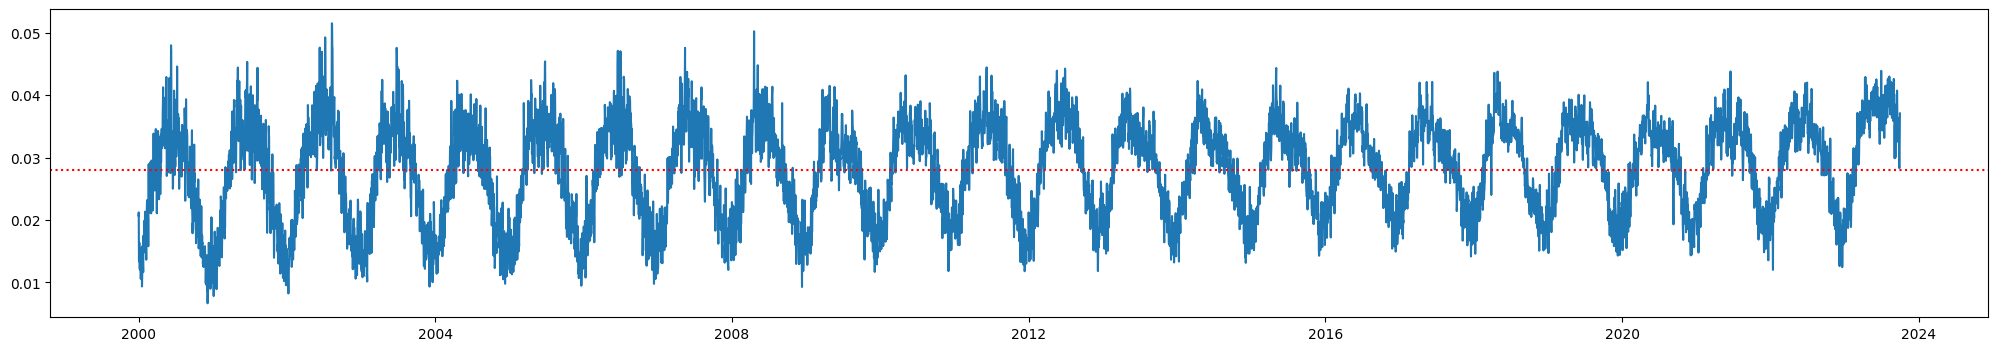

In [42]:
plt.figure(figsize = (25, 4))
plt.plot(time_series_data)
plt.axhline(time_series_data.mean(), color = 'red', linestyle = ':')
plt.annotate('mean')

plt.show()

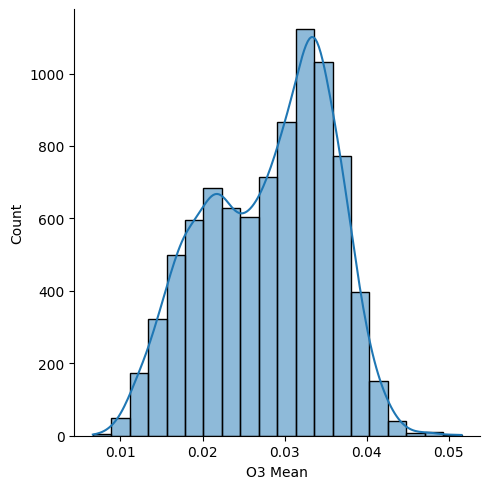

In [51]:
sns.displot(time_series_data, bins = 20, kde = True)
plt.show()